In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
D:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# define parameters
S0 = 1.50 # underlying asset price
U = 1.71 # upper bound
L = 1.29 # lower bound
K = 1.40 # strike price
T = 1.0 # time to expiration
r = 0.03 # risk-free interest rate
N = 1000 # dt = T/N
M = 10000 # number of simulations
v0 = 0.04 # initial variance
kappa = 1.0 # the speed at which the volatility reverts to its long-term mean (theta)
theta = 0.04 # long-term mean level of the volatility
rho = -0.5 # correlation between the Brownian motions driving the stock price and the volatility
sigma_v = 1 # volitality of variance

In [3]:
paths_S = np.zeros((M,N+1))

In [4]:
paths_S.shape

(10000, 1001)

In [5]:
paths_S[:,0] = S0

In [6]:
paths_V = np.zeros((M,N+1))

In [7]:
paths_V.shape

(10000, 1001)

In [8]:
paths_V[:,0] = v0

In [ ]:
import math
dt = T/N # 每个小时间区间
for k in range(10):
    for i in range(M): # 进入每一次蒙特卡罗迭代
        for j in range(1,N+1): # 进入每一个小时间点
            z_v = np.random.randn(1)
            z_s_0 = np.random.randn(1)
            z_s = rho*z_v+np.sqrt(1-rho**2)*z_s_0
            paths_V[i,j] = paths_V[i,j-1] + kappa*(theta-max(paths_V[i,j-1],0))*dt+sigma_v*np.sqrt(max(0,paths_V[i,j-1])*dt)*z_v
            paths_S[i,j] = np.exp((math.log(paths_S[i,j-1]))-0.5*max(0,paths_V[i,j-1])*dt+np.sqrt(max(0,paths_V[i,j-1])*dt)*z_s)
    # 得到每个 股价矩阵（一共10个）
    # 下面考虑 每个股价矩阵的生存情况
    payoff_local = np.zeros((M,N+1))
    for i in range(10000): # 模拟次数
        for j in range(1,1001): # 时间点1-1000
            if (paths_S[i,j] < U and j<=501) or (j>=501 and j<=int(8/12*1000)+1) or(paths_S[i,j] > L and (j>=(int(8/12*1000)+1) and j<=(int(11/12*1000)+1))) or (paths_S[i,j]>=1.3 and paths_S[i,j]<=1.8 and j>=int(11/12*1000)+1):
                payoff_local[i,j] = np.maximum(0,paths_S[i,j]-K)
                if j == 1000:
                    mark = i
                    break
            else:
                paths_S[i,j:] = 0
                payoff_local[i,j] = 0
                mark0 = i
                break
    print("运行第{}次".format(k+1))
    print("payoff均值为{}".format(payoff_local[:,-1].mean()))
    option_v = payoff_local[:,-1]*np.exp(-r)
    print("期权价格为{}".format(payoff_local[:,-1].mean()*np.exp(-r)))
    print("期权估计的标准误为{}".format(((option_v.std())/100)))

运行第1次
payoff均值为0.09854458971853332
期权价格为0.0956321569477209
期权估计的标准误为0.0009493277617395621
运行第2次
payoff均值为0.10025821157890946
期权价格为0.09729513362831402
期权估计的标准误为0.0009568075863696685


In [48]:
mark

9999

In [49]:
mark0

9998

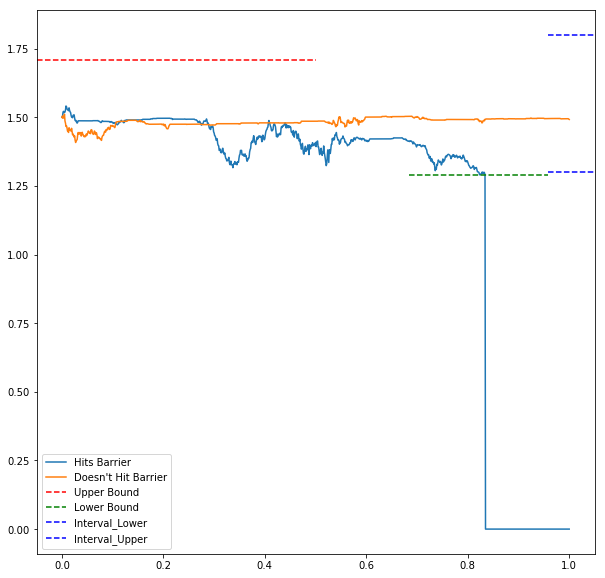

In [63]:
# Plot the sample paths
plt.figure(figsize=(10, 6))
t_grid = np.linspace(0, T, N+1)
plt.plot(t_grid, paths_S[mark0], label='Hits Barrier')
plt.plot(t_grid, paths_S[mark], label = "Doesn't Hit Barrier")
# Add annotations for the upper and lower bounds
plt.axhline(y=1.71, linestyle='--', color='red', label='Upper Bound',xmin = 0,xmax = 0.5)
plt.axhline(y=1.29, linestyle='--', color='green', label='Lower Bound',xmin = 8/12, xmax = 11/12)
plt.axhline(y=1.3, linestyle='--', color='blue', label='Interval_Lower',xmin = 11/12, xmax = 1)
plt.axhline(y=1.8, linestyle='--', color='blue', label='Interval_Upper',xmin = 11/12, xmax = 1)
# Add legend
plt.legend()
# Show plot
plt.show()